In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/users/youcefdjeddar/downloads/meteorite-landings.csv')
top_10 = data['recclass'].value_counts().index.tolist()[:10]
df = data[data['recclass'].isin(top_10)]

In [4]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"


In [5]:
df.mass.describe()

count    3.585300e+04
mean     1.388358e+03
std      2.740639e+04
min      1.000000e-02
25%      6.300000e+00
50%      2.530000e+01
75%      1.440000e+02
max      4.000000e+06
Name: mass, dtype: float64

Text(0.5,1,'Seaborn Box Plot')

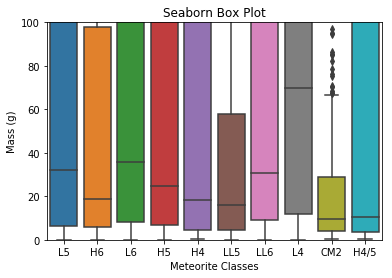

In [6]:
sns.boxplot(x ='recclass', y='mass', data = df)
plt.ylim(0, 100)
plt.xlabel('Meteorite Classes')
plt.ylabel('Mass (g)')
plt.title('Seaborn Box Plot')
#Seaborn BP zoomed in the y-axis as the mass is on average between 0 and 100g (otherwise the planet would've been obliterated)

In [7]:
mass = df['mass']
x = np.sort(df.mass)
y = np.arange(1, len(x)+1)/len(x)

In [8]:
#Deleting the NaNs to have coherent statistical analysis
df1 = df[np.isfinite(df.mass)]
#Mass with no NaNs
mass1= df1.mass

Text(0.5,1,'CDF')

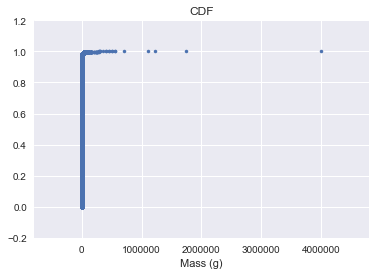

In [9]:
#CDF
sns.set()
_ = plt.plot(x, y, marker= '.', linestyle='none')
plt.xlim = (0, 1000000)
plt.margins(0.2)
plt.xlabel('Mass (g)')
plt.title('CDF')
#The graph doesn't tell us a lot about the distribution

Text(0.5,0,'Mass (g)')

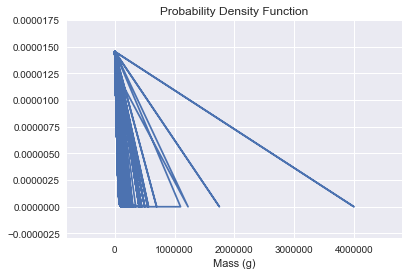

In [10]:
mean = np.mean(mass1)
std = np.std(mass1)
length = len(df1)
p=norm.pdf(mass1, mean, std)
plt.plot(mass1, p)
plt.margins(0.2)
plt.title ('Probability Density Function')
plt.xlabel('Mass (g)')
#Let's try a PDF 

In [25]:
#Let's now perform a z-test to compare the mean of the mass of the top 10 meteorite classes with the mean of the remaining classes
#First let's get the information of the remaining classes
non_top_10 = data['recclass'].value_counts().index.tolist()[10:]
df2 = data[data['recclass'].isin(non_top_10)]
#Deleting the NaNs for accurate statistical analysis
df3 = df2[np.isfinite(df2.mass)]
mean1 = np.mean(df3.mass)
std1 = np.mean(df3.mass)
df3.mass.describe()

count    9.732000e+03
mean     5.708019e+04
std      1.242383e+06
min      0.000000e+00
25%      1.561000e+01
50%      9.750000e+01
75%      5.790000e+02
max      6.000000e+07
Name: mass, dtype: float64

In [26]:
#T-stat and P-value for the top 10 classes
t = stats.ttest_1samp(mass1, mean)[0]
p = stats.ttest_1samp(mass1, mean)[1]
print("T stat:", t)
print("P value:", p)

T stat: -4.712727414174941e-14
P value: 0.9999999999999625


In [27]:
#T-stat and P-value for the remaining classes
t = stats.ttest_1samp(df3.mass, mean1)[0]
p = stats.ttest_1samp(df3.mass, mean1)[1]
print("T stat:", t)
print("P value:", p)

T stat: -8.088418772875399e-15
P value: 0.9999999999999936
